# MMA 823 Final Project
Predicting DJIA Adj Close Direction based on Reddit News

## Business/Data Understanding

Information about data sources:
* DJIA_table.csv: Downloaded from Yahoo Finance
* CombinedNewsDJIA.csv: The first column is "Date", the second is "Label", and the following ones are news headlines ranging from "Top1" to "Top25" from Reddit on that date.

This is a binary classification task:
* "1" when DJIA Adj Close value rose or stayed as the same;
* "0" when DJIA Adj Close value decreased.

The data can be accessed here @ Kaggle: https://www.kaggle.com/c/mmagmma-865-final-project-2/submissions

In [401]:
#Import Libraries
import pandas as pd
import numpy as np
import re

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

import re
import string
import unicodedata


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_colwidth', None)

In [402]:
comb_news = pd.read_csv("Combined_News_DJIA.csv")
djia = pd.read_csv("upload_DJIA_table.csv")

In [403]:
comb_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1989 non-null   object
 1   Label   1989 non-null   int64 
 2   Top1    1989 non-null   object
 3   Top2    1989 non-null   object
 4   Top3    1989 non-null   object
 5   Top4    1989 non-null   object
 6   Top5    1989 non-null   object
 7   Top6    1989 non-null   object
 8   Top7    1989 non-null   object
 9   Top8    1989 non-null   object
 10  Top9    1989 non-null   object
 11  Top10   1989 non-null   object
 12  Top11   1989 non-null   object
 13  Top12   1989 non-null   object
 14  Top13   1989 non-null   object
 15  Top14   1989 non-null   object
 16  Top15   1989 non-null   object
 17  Top16   1989 non-null   object
 18  Top17   1989 non-null   object
 19  Top18   1989 non-null   object
 20  Top19   1989 non-null   object
 21  Top20   1989 non-null   object
 22  Top21   1989 non-null   

In [404]:
djia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


In [405]:
comb_news.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as countries move to brink of war""",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)',"b'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire'","b""Afghan children raped with 'impunity,' U.N. official says - this is sick, a three year old was raped and they do nothing""",b'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.',"b""Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO's side""","b""The 'enemy combatent' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it.""",...,"b'Georgia Invades South Ossetia - if Russia gets involved, will NATO absorb Georgia and unleash a full scale war?'",b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to prevent an Israeli strike on Iran."" Israeli Defense Minister Ehud Barak: ""Israel is prepared for uncompromising victory in the case of military hostilities.""'",b'This is a busy day: The European Union has approved new sanctions against Iran in protest at its nuclear programme.',"b""Georgia will withdraw 1,000 soldiers from Iraq to help fight off Russian forces in Georgia's breakaway region of South Ossetia""",b'Why the Pentagon Thinks Attacking Iran is a Bad Idea - US News &amp; World Report',b'Caucasus in crisis: Georgia invades South Ossetia',"b'Indian shoe manufactory - And again in a series of ""you do not like your work?""'",b'Visitors Suffering from Mental Illnesses Banned from Olympics',"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,"b'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?'",b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli training, we're fending off Russia """,b'Georgian army flees in disarray as Russians advance - Gori abandoned to Russia without a shot fired',"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zealand Passports doing in Iraq?',b'Russia angered by Israeli military sale to Georgia',b'An American citizen living in S.Ossetia blames U.S. and Georgian leaders for the genocide of innocent people',...,b'Israel and the US behind the Georgian aggression?',"b'""Do not believe TV, neither Russian nor Georgian. There are much more victims""'",b'Riots are still going on in Montreal (Canada) because police murdered a boy on Saturday.',b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Torture',b' Russia has just beaten the United States over the head with Peak Oil',b'Perhaps *the* question about the Georgia - Russia conflict ',b'Russia is so much better at war',"b""So this is what it's come to: trading sex for food."""
2,2008-08-12,0,"b'Remember that adorable 9-year-old who sang at the opening ceremonies? That was fake, too.'","b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would have no children...""'","b""Al-Qa'eda is losing support in Iraq because of a brutal crackdown on activities it regards as un-Islamic - including women buying cucumbers""",b'Ceasefire in Georgia: Putin Outmaneuvers the West',b'Why Microsoft and Intel tried to kill the XO $100 laptop',b'Stratfor: The Russo-Georgian War and the Balance of Power ',"b""I'm Trying to Get a Sense of This Whole Georgia-Russia War: Vote Up If You Think Georgia Started It, Or Down If you Think Russia Did""",...,b'U.S. troops still in Georgia (did you know they were in Georgia in the first place?)',b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. 

In [406]:
comb_news.tail()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1984,2016-06-27,0,Barclays and RBS shares suspended from trading after tanking more than 8%,Pope says Church should ask forgiveness from gays for past treatment,Poland 'shocked' by xenophobic abuse of Poles in UK,"There will be no second referendum, cabinet agrees","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid Brexit uncertainty,No negative news about South African President allowed on state broadcaster.,Surge in Hate Crimes in the U.K. Following U.K.s Brexit Vote,...,German lawyers to probe Erdogan over alleged war crimes,"Boris Johnson says the UK will continue to ""intensify"" cooperation with the EU and tells his fellow Leave supporters they must accept the 52-48 referendum win was ""not entirely overwhelming"".",Richard Branson is calling on the UK government to hold a second EU referendum to prevent 'irreversible damage' to the country.,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon from Obama,"Brexit opinion poll reveals majority don't want second EU referendum: ""half (48%) of British adults say that they are happy with the result, with two in five (43%) saying they are unhappy with the outcome.""","Conservative MP Leave Campaigner: ""The leave campaign don't have a post-Brexit plan...""","Economists predict UK recession, further weakening of Pound following Brexit.","New EU 'superstate plan by France, Germany: Creating a European superstate limiting the powers of individual members following Britains referendum decision to leave the EU",Pakistani clerics declare transgender marriages legal under Islamic law
1985,2016-06-28,1,"2,500 Scientists To Australia: If You Want To Save The Great Barrier Reef, Stop Supporting Coal","The personal details of 112,000 French police officers have been uploaded to Google Drive in a security breach just a fortnight after two officers were murdered at their home by a jihadist.",S&amp;P cuts United Kingdom sovereign credit rating to 'AA' from 'AAA',Huge helium deposit found in Africa,CEO of the South African state broadcaster quits shortly after negative news about president is banned.,"Brexit cost investors $2 trillion, the worst one day drop ever",Hong Kong democracy activists call for return to British rule as first step to independence,Brexit: Iceland president says UK can join 'triangle' of non-EU countries,...,"US, Canada and Mexico pledge 50% of power from clean energy by 2025","There is increasing evidence that Australia is torturing refugees, medical experts claim","Richard Branson, the founder of Virgin Group, said Tuesday that the company has lost about a third of its value since the U.K. voted to leave the European Union last week.","37,000-yr-old skull from Borneo reveals surprise for scientists - Study of the ""Deep Skull"" - oldest modern human discovered in SE Asia - reveals this ancient person was not related to Indigenous Australians, as originally thought. ""Our discovery is a game changer.""",Palestinians stone Western Wall worshipers; police shut Temple Mount to non-Muslims,Jean-Claude Juncker asks Farage: Why are you here?,"""Romanians for Remainians"" offering a new home to the 48% of Britons who voted to stay in the EU | Bucharest newspaper's app connects loving Romanian families with needy Brits, allowing people to offer to help would-be immigrants apply for a Romanian ID",Brexit: Gibraltar in talks with Scotland to stay in EU,8 Suicide Bombers Strike Lebanon,"Mexico's security forces routinely use 'sexual torture' against women: Rights group Amnesty International has compiled testimonies of sexual violence used as torture by Mexican security forces. Despite thousands of complaints, only 15 probes have led to criminal convictions since 1991."
1986,2016-06-29,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offspring of Wahhabism of Al S

In [407]:
djia.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


## Data Preparation

In [408]:
df = comb_news.merge(djia, on='Date', validate="1:1")

In [409]:
df['Date'] = pd.to_datetime(df['Date'])

In [410]:
df['News'] = df['Top1']+" "+df['Top2']+" "+df['Top3']+" "+df['Top4']+" "+df['Top5']+" "+df['Top6']+" "+df['Top7']+" "+df['Top8']+" "+df['Top9']+" "+df['Top10']+" "+df['Top11']+" "+df['Top12']+" "+df['Top13']+" "+df['Top14']+" "+df['Top15']+" "+df['Top16']+" "+df['Top17']+" "+df['Top18']+" "+df['Top19']+" "+df['Top20']+" "+df['Top21']+" "+df['Top22']+" "+df['Top23']+" "+df['Top24']+" "+df['Top25']

In [411]:
df = df.drop(columns=['Top1','Top2','Top3','Top4','Top5','Top6','Top7','Top8','Top9','Top10','Top11','Top12','Top13','Top14','Top15','Top16','Top17','Top18','Top19','Top20','Top21','Top22','Top23','Top24','Top25'])

In [412]:
df.head()

,Date,Label,Open,High,Low,Close,Volume,Adj Close,News
0,2008-08-08,0,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,"b""Georgia 'downs two Russian warplanes' as countries move to brink of war"" b'BREAKING: Musharraf to be impeached.' b'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)' b'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire' b""Afghan children raped with 'impunity,' U.N. official says - this is sick, a three year old was raped and they do nothing"" b'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.' b""Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO's side"" b""The 'enemy combatent' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it."" b'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]' b'Did the U.S. Prep Georgia for War with Russia?' b'Rice Gives Green Light for Israel to Attack Iran: Says U.S. has no veto over Israeli military ops' b'Announcing:Class Action Lawsuit on Behalf of American Public Against the FBI' b""So---Russia and Georgia are at war and the NYT's top story is opening ceremonies of the Olympics? What a fucking disgrace and yet further proof of the decline of journalism."" b""China tells Bush to stay out of other countries' affairs"" b'Did World War III start today?' b'Georgia Invades South Ossetia - if Russia gets involved, will NATO absorb Georgia and unleash a full scale war?' b'Al-Qaeda Faces Islamist Backlash' b'Condoleezza Rice: ""The US would not act to prevent an Israeli strike on Iran."" Israeli Defense Minister Ehud Barak: ""Israel is prepared for uncompromising victory in the case of military hostilities.""' b'This is a busy day: The European Union has approved new sanctions against Iran in protest at its nuclear programme.' b""Georgia will withdraw 1,000 soldiers from Iraq to help fight off Russian forces in Georgia's breakaway region of South Ossetia"" b'Why the Pentagon Thinks Attacking Iran is a Bad Idea - US News &amp; World Report' b'Caucasus in crisis: Georgia invades South Ossetia' b'Indian shoe manufactory - And again in a series of ""you do not like your work?""' b'Visitors Suffering from Mental Illnesses Banned from Olympics' b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,"b'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?' b'Bush puts foot down on Georgian conflict' b""Jewish Georgian minister: Thanks to Israeli training, we're fending off Russia "" b'Georgian army flees in disarray as Russians advance - Gori abandoned to Russia without a shot fired' b""Olympic opening ceremony fireworks 'faked'"" b'What were the Mossad with fraudulent New Zealand Passports doing in Iraq?' b'Russia angered by Israeli military sale to Georgia' b'An American citizen living in S.Ossetia blames U.S. and Georgian leaders for the genocide of innocent people' b'Welcome To World War IV! Now In High Definition!' b""Georgia's move, a mistake of monumental proportions "" b'Russia presses deeper into Georgia; U.S. says regime change is goal' b'Abhinav Bindra wins first ever Individual Olympic Gold Medal for India' b' U.S. ship heads for Arctic to define territory' b'Drivers in a Jerusalem taxi station threaten to quit rather than work for their new boss - an Arab' b'The French Team is Stunned by Phelps and the 4x100m Relay Team' b'Israel and the US behind the Georgian aggression?' b'""Do not believe TV, neither Russian nor Georgian. There are much more victims""' b'Riots are still going on in Montreal (Canada) because police murdered a boy on Saturday.' b'China to overtake US as largest manufacturer' b'War in 

In [413]:
df['News'].fillna(' ', inplace=True)

## Text Prepocessing 
To create our bag of words feature vector, the text in the News field needed to be cleaned first. The cleaning removes variation due to capitalization, words with little meaning (stop words), and variations of a root word (lemmatizing). When words are extremely rare, they will add little value to our predictive model, so the preprocessing helps to ensure this does not happen as often. In totality, our text preprocessor set the words to lower case, removed punctuation, stop words, and then lemmatized the words. Additionally, it removes any HTML, URLS, non-unicode and numbers.

In [414]:
# Simple preprocessor.
# Input is a single document, as a single string.
# Otuput should be a single document, as a single string.
from nltk.corpus import stopwords 
from bs4 import BeautifulSoup

stop_words = set(stopwords.words('english'))

lemmer = WordNetLemmatizer()

def my_preprocess(doc):
    # Remove HTML tags
    doc = BeautifulSoup(doc, "lxml").get_text()
    # Lowercase
    doc = doc.lower()
    
    # Remove URLs
    doc = re.sub(r'http\S+', '', doc)
    
    # Remove punctuation
    doc = re.sub(r'[^\w\s]', '', doc)
    
    
    # Remove numbers
    doc = re.sub(r'\d+', '', doc)
    
    # Remove stopwords and lemmatize
    doc = [lemmer.lemmatize(w) for w in doc.split() if w not in stop_words]
    return ' '.join(doc) 

    return doc

## Data Exploration 
### Top Unigrams

In [415]:
%time df['News'] = df['News'].apply(my_preprocess)

Wall time: 3.27 s


In [416]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

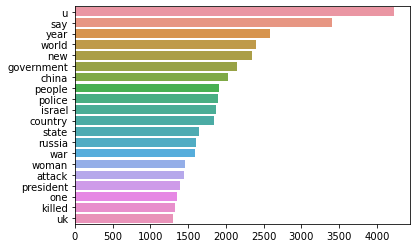

In [417]:
plot_top_non_stopwords_barchart(df['News'])

### Top Trigrams

In [418]:
# Code Snippet for Top N-grams Barchart

from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x,color='green')

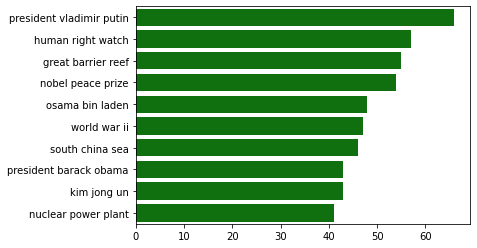

In [419]:
plot_top_ngrams_barchart(df['News'],3)

### Word Clouds

In [420]:
def to_words(content):
    letters = re.sub("[^a-zA-Z]"," ", content)
    words = letters.lower().split()
    stops = set(stopwords.words("english"))
    mwords = [w for w in words if not w in stops]
    return(" ".join( mwords))

In [421]:
non_down = df[df['Label']==1]
down = df[df['Label']==0]
print(len(non_down)/len(df))

0.5354449472096531


In [422]:
non_down_word = []
down_word = []
for word in non_down['News']:
    non_down_word.append(to_words(word))

for word in down['News']:
    down_word.append(to_words(word))

In [423]:
from wordcloud import WordCloud,STOPWORDS
wordcloud_down = WordCloud(background_color='black',
                          width=3000,
                          height=2500
                          ).generate(down_word[0])

<Figure size 576x576 with 0 Axes>

(-0.5, 2999.5, 2499.5, -0.5)

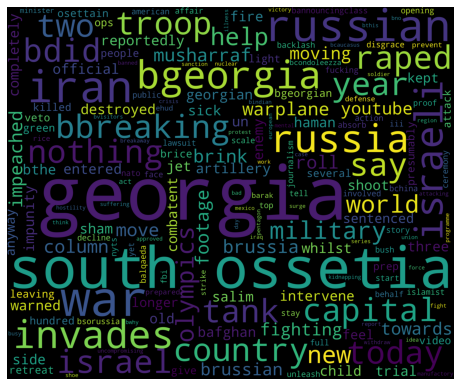

In [424]:
import matplotlib.pyplot as plt
plt.figure(1,figsize=(8,8))
plt.imshow(wordcloud_down)
plt.axis('off')
plt.show()

In [425]:
wordcloud_non = WordCloud(background_color='white',
                         width=3000,
                         height=2500
                         ).generate(non_down_word[0])

<Figure size 576x576 with 0 Axes>

(-0.5, 2999.5, 2499.5, -0.5)

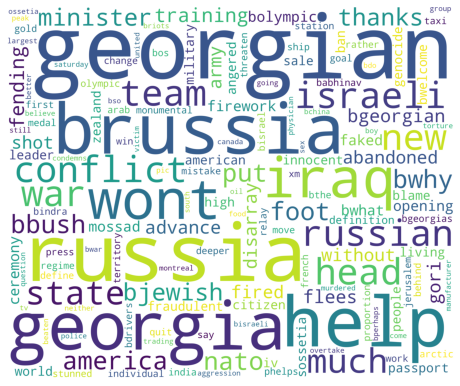

In [426]:
plt.figure(1,figsize=(8,8))
plt.imshow(wordcloud_non)
plt.axis('off')
plt.show()

## Modelling
References:  
https://stackoverflow.com/questions/30055303/add-features-to-an-sklearn-classifier/30055636  
https://scikit-learn.org/stable/modules/compose.html#columntransformer-for-heterogeneous-data  

### Train-Test Split

In [427]:
#Reload df - results changed from previous report due to addition of EDA
df = comb_news.merge(djia, on='Date', validate="1:1")
df['Date'] = pd.to_datetime(df['Date'])
df['News'] = df['Top1']+" "+df['Top2']+" "+df['Top3']+" "+df['Top4']+" "+df['Top5']+" "+df['Top6']+" "+df['Top7']+" "+df['Top8']+" "+df['Top9']+" "+df['Top10']+" "+df['Top11']+" "+df['Top12']+" "+df['Top13']+" "+df['Top14']+" "+df['Top15']+" "+df['Top16']+" "+df['Top17']+" "+df['Top18']+" "+df['Top19']+" "+df['Top20']+" "+df['Top21']+" "+df['Top22']+" "+df['Top23']+" "+df['Top24']+" "+df['Top25']
df = df.drop(columns=['Top1','Top2','Top3','Top4','Top5','Top6','Top7','Top8','Top9','Top10','Top11','Top12','Top13','Top14','Top15','Top16','Top17','Top18','Top19','Top20','Top21','Top22','Top23','Top24','Top25'])
df['News'].fillna(' ', inplace=True)

In [428]:
#Train-test split
start_date = pd.to_datetime('2008-08-08')
end_date = pd.to_datetime('2014-12-31')
train = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
test  = df[(df['Date'] > end_date)]
X_train = train['News']
X_test = test['News']
y_train = train['Label']
y_test = test['Label']

### Building Pipeline and Basic Modelling with Bag of Words Only
Once the News field had been cleaned, vectorization is the process of turning the text into a set of features, where each word from the text becomes a feature. The values of the features are determined by various vectorization methods and we used two methods: Count Vectorizer and Term Frequency Inverse Document Frequency (TFIDF). Count Vectorizer returns the frequency of each word’s occurrence in each document. TFIDF’s basic premise is to take a term's frequency in a document, and then decrease it by how common that term is in the entire corpus (rare words get a higher score). 

In [429]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression

vectorizer = CountVectorizer(preprocessor = my_preprocess)
dt = LogisticRegression(max_iter=500, solver='liblinear')

pipe = Pipeline([('vect', vectorizer), ('clf', dt)])

In [430]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(preprocessor=<function my_preprocess at 0x00000246FE6898B8>)),
                ('clf', LogisticRegression(max_iter=500, solver='liblinear'))])

In [431]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

pred_val = pipe.predict(X_test)

print("Confusion matrix:")
print(confusion_matrix(y_test, pred_val))

print("\nAccuracy Score = {:.5f}".format(accuracy_score(y_test, pred_val)))

print("\nClassification Report:")
print(classification_report(y_test, pred_val))

Confusion matrix:
[[ 59 127]
 [ 84 108]]

Accuracy Score = 0.44180

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.32      0.36       186
           1       0.46      0.56      0.51       192

    accuracy                           0.44       378
   macro avg       0.44      0.44      0.43       378
weighted avg       0.44      0.44      0.43       378



In [432]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1611 entries, 0 to 1610
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1611 non-null   datetime64[ns]
 1   Label      1611 non-null   int64         
 2   Open       1611 non-null   float64       
 3   High       1611 non-null   float64       
 4   Low        1611 non-null   float64       
 5   Close      1611 non-null   float64       
 6   Volume     1611 non-null   int64         
 7   Adj Close  1611 non-null   float64       
 8   News       1611 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 125.9+ KB


### Add in Financial Price Features
For our feature vector, we have also added in the DJIA stock pricing information from the previous day (Open, High, Low, Close, Volume, Adj Close) of the target and used the Standard Scaler (transform values to have mean of 0 and standard deviation of 1). Our feature vector contains the DJIA stock prices, and the bag of words.

In [433]:
X_train = train[['Open','High','Low','Close','Volume','Adj Close','News']]
X_test = test[['Open','High','Low','Close','Volume','Adj Close','News']]
y_train = train['Label']
y_test = test['Label']

In [434]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(
    [('scaler', StandardScaler(),['Open','High','Low','Close','Volume','Adj Close']),
     ('vectorizer', CountVectorizer(preprocessor = my_preprocess), 'News')],
    remainder='drop')

In [435]:
#ct.fit(X_train)
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

## Evaluation

### Testing Different Models on Test Set with Term Frequency Bag of Words
We leveraged five different models for our baseline model: Random Forest, Logistic Regression, Adaboost, Gradient Boost, and Support Vector Machines. Different models respond differently to data of different shapes and sizes, and for different types of problems. Here, we do not know which one will work best, so we decided to experiment and try numerous models. At this point, we are using the Count Vectorizer approach of vectorization.  

In [436]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

results = []

def build_model(X_train, y_train, X_test, y_test, preprocess):
    
    print("RF")
    clf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=55)
    %time clf.fit(X_train, y_train)

    #imp = pd.DataFrame(clf.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False).iloc[0:15,:]
    #print(imp)
    
    y_pred = clf.predict(X_test)
    
    print("\nAccuracy Score = {:.5f}".format(accuracy_score(y_test, y_pred)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    results.append([preprocess, "RF", accuracy_score(y_test, y_pred)])
    
    print("Adaboost")
    clf = AdaBoostClassifier(n_estimators=200)
    %time clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("\nAccuracy Score = {:.5f}".format(accuracy_score(y_test, y_pred)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    results.append([preprocess, "Adaboost", accuracy_score(y_test, y_pred)])
    
    print("GTB")
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=45)
    %time clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("\nAccuracy Score = {:.5f}".format(accuracy_score(y_test, y_pred)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    results.append([preprocess, "GTB", accuracy_score(y_test, y_pred)])
    
    print("LR")
    clf = LogisticRegression(max_iter=500, solver='liblinear')
    %time clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    print("\nAccuracy Score = {:.5f}".format(accuracy_score(y_test, y_pred)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    results.append([preprocess, "LR", accuracy_score(y_test, y_pred)])
    
    #print("NB")
    #clf = GaussianNB()
    #%time clf.fit(X_train, y_train)


    #y_pred = clf.predict(X_test)
    #print("\nAccuracy Score = {:.5f}".format(accuracy_score(y_test, y_pred)))
    #print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))
    
    #results.append([preprocess, "NB", accuracy_score(y_test, y_pred)])

    print("SVC")
    clf = SVC(gamma='auto')
    %time clf.fit(X_train, y_train)


    y_pred = clf.predict(X_test)
    print("\nAccuracy Score = {:.5f}".format(accuracy_score(y_test, y_pred)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    results.append([preprocess, "SVC", accuracy_score(y_test, y_pred)])
    

build_model(X_train, y_train, X_test, y_test, "BOW - TF")


RF
Wall time: 1.31 s

Accuracy Score = 0.50794
[[  0 186]
 [  0 192]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       186
           1       0.51      1.00      0.67       192

    accuracy                           0.51       378
   macro avg       0.25      0.50      0.34       378
weighted avg       0.26      0.51      0.34       378

Adaboost


C:\Users\jdonv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Wall time: 5.11 s

Accuracy Score = 0.53439
[[ 94  92]
 [ 84 108]]
              precision    recall  f1-score   support

           0       0.53      0.51      0.52       186
           1       0.54      0.56      0.55       192

    accuracy                           0.53       378
   macro avg       0.53      0.53      0.53       378
weighted avg       0.53      0.53      0.53       378

GTB
Wall time: 1.6 s

Accuracy Score = 0.54497
[[ 77 109]
 [ 63 129]]
              precision    recall  f1-score   support

           0       0.55      0.41      0.47       186
           1       0.54      0.67      0.60       192

    accuracy                           0.54       378
   macro avg       0.55      0.54      0.54       378
weighted avg       0.55      0.54      0.54       378

LR
Wall time: 143 ms

Accuracy Score = 0.44709
[[ 59 127]
 [ 82 110]]
              precision    recall  f1-score   support

           0       0.42      0.32      0.36       186
           1       0.46      0

C:\Users\jdonv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [437]:
results = pd.DataFrame(results, columns=['Preprocessing', 'Estimator', 'Accuracy'])
results.sort_values(by='Accuracy', ascending=False)

,Preprocessing,Estimator,Accuracy
2,BOW - TF,GTB,0.544974
1,BOW - TF,Adaboost,0.534392
0,BOW - TF,RF,0.507937
4,BOW - TF,SVC,0.507937
3,BOW - TF,LR,0.447090


### Hyperparmeter Tuning
From here, we used hyperparameter tuning on the training set for the Gradient Boost model to determine if the results would improve with tuned hyperparameters. We performed hyperparameter tuning with both the Count Vectorizier and TFIDF Vectorizer. 

In [438]:
X_train = train[['Open','High','Low','Close','Volume','Adj Close','News']]
X_test = test[['Open','High','Low','Close','Volume','Adj Close','News']]
y_train = train['Label']
y_test = test['Label']

#### Count Vectorizer Bag of Words

In [439]:
#https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
dt = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=45)

preprocessor=ColumnTransformer(
    [('scaler', StandardScaler(),['Open','High','Low','Close','Volume','Adj Close']),
     ('vect', CountVectorizer(preprocessor = my_preprocess), 'News')],
    remainder='drop')

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', dt)])

parameters = {
    'preprocessor__vect__max_df': (0.5, 0.75, 1.0),
    'preprocessor__vect__max_features': (100, 1000, 2000),
    'preprocessor__vect__ngram_range': ((1, 1), (1, 2), (1,3))  # unigrams or bigrams,
}


from sklearn.model_selection import GridSearchCV
search = GridSearchCV(clf, parameters, cv=3, scoring='accuracy').fit(X_train, y_train)

print("Best Estimator: \n{}\n".format(search.best_estimator_))
print("Best Parameters: \n{}\n".format(search.best_params_))
print("Best Test Score: \n{}\n".format(search.best_score_))
#print("All Test Scores: \n{}\n".format(search.cv_results_['mean_test_score']))
# # This prints out all results during Cross-Validation in details
#print("All Meta Results During CV Search: \n{}\n".format(search.cv_results_))

Best Estimator: 
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Open', 'High', 'Low',
                                                   'Close', 'Volume',
                                                   'Adj Close']),
                                                 ('vect',
                                                  CountVectorizer(max_df=0.75,
                                                                  max_features=2000,
                                                                  ngram_range=(1,
                                                                               3),
                                                                  preprocessor=<function my_preprocess at 0x00000246FE6898B8>),
                                                  'News')])),
                ('classifier',
                 GradientBoostingClassifier(learning_r

### TFIDF Bag of Words

In [440]:
vectorizer = TfidfVectorizer(preprocessor = my_preprocess)
dt = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=45)

preprocessor=ColumnTransformer(
    [('scaler', StandardScaler(),['Open','High','Low','Close','Volume','Adj Close']),
     ('vect', TfidfVectorizer(preprocessor = my_preprocess), 'News')],
    remainder='drop')

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', dt)])

parameters = {
    'preprocessor__vect__max_df': (0.5, 0.75, 1.0),
    'preprocessor__vect__max_features': (100, 1000, 2000),
    'preprocessor__vect__ngram_range': ((1, 1), (1, 2), (1,3))  # unigrams or bigrams,
    
}


from sklearn.model_selection import GridSearchCV
search = GridSearchCV(clf, parameters, cv=3, scoring='accuracy').fit(X_train, y_train)

print("Best Estimator: \n{}\n".format(search.best_estimator_))
print("Best Parameters: \n{}\n".format(search.best_params_))
print("Best Test Score: \n{}\n".format(search.best_score_))
#print("All Test Scores: \n{}\n".format(search.cv_results_['mean_test_score']))
# # This prints out all results during Cross-Validation in details
#print("All Meta Results During CV Search: \n{}\n".format(search.cv_results_))

Best Estimator: 
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Open', 'High', 'Low',
                                                   'Close', 'Volume',
                                                   'Adj Close']),
                                                 ('vect',
                                                  TfidfVectorizer(max_df=0.5,
                                                                  max_features=1000,
                                                                  preprocessor=<function my_preprocess at 0x00000246FE6898B8>),
                                                  'News')])),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=1.0, max_depth=1,
                                            random_state=45))])

Best Parameters: 
{'preprocessor__vect__max_df': 0.5, 'preprocessor__vect__max_

In [441]:
#https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
#vectorizer = TfidfVectorizer(preprocessor = my_preprocess)
dt = GradientBoostingClassifier(random_state=45, learning_rate=0.25, n_estimators=25)

#preprocessor=ColumnTransformer(
#    [('scaler', StandardScaler(),['Open','High','Low','Close','Volume','Adj Close']),
#     ('vect', TfidfVectorizer(preprocessor = my_preprocess), 'News')],
#    remainder='drop')
preprocessor=ColumnTransformer(
    [('scaler', StandardScaler(),['Open','High','Low','Close','Volume','Adj Close']),
     ('vect', TfidfVectorizer(preprocessor = my_preprocess, max_features=2000, ngram_range=(1,1)), 'News')],
    remainder='drop')


clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', dt)])
# This takes a long time to run. Outputting a smaller subset that was the best result from prior run
#parameters = {
#    'preprocessor__vect__max_df': (0.5, 0.75, 1.0),
#    'preprocessor__vect__max_features': (100, 1000, 2000),
#    'preprocessor__vect__ngram_range': ((1, 1), (1, 2), (1,3)),  # unigrams or bigrams,
#    'classifier__learning_rate': (0.25, 0.75, 1.0),
#    'classifier__n_estimators': (25, 75, 100),
#    'classifier__max_depth': (1, 3, 5)
    
#}
parameters = {
    'preprocessor__vect__max_df': (0.5, 1.0),
    'classifier__max_depth': ((1,3))
    
}


from sklearn.model_selection import GridSearchCV
search = GridSearchCV(clf, parameters, cv=3, scoring='accuracy').fit(X_train, y_train)

print("Best Estimator: \n{}\n".format(search.best_estimator_))
print("Best Parameters: \n{}\n".format(search.best_params_))
print("Best Test Score: \n{}\n".format(search.best_score_))
#print("All Test Scores: \n{}\n".format(search.cv_results_['mean_test_score']))
# # This prints out all results during Cross-Validation in details
#print("All Meta Results During CV Search: \n{}\n".format(search.cv_results_))

Best Estimator: 
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Open', 'High', 'Low',
                                                   'Close', 'Volume',
                                                   'Adj Close']),
                                                 ('vect',
                                                  TfidfVectorizer(max_features=2000,
                                                                  preprocessor=<function my_preprocess at 0x00000246FE6898B8>),
                                                  'News')])),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.25, max_depth=1,
                                            n_estimators=25,
                                            random_state=45))])

Best Parameters: 
{'classifier__max_depth': 1, 'preprocessor__vect__max_df': 1.0}

Best Test Sc

In [442]:
search.best_estimator_[1].feature_importances_

array([0., 0., 0., ..., 0., 0., 0.])

In [443]:
#https://stackoverflow.com/questions/61079602/how-do-i-get-feature-names-using-a-column-transformer
search.best_estimator_[0].transformers_[1][1].get_feature_names()

['abandoned',
 'able',
 'abortion',
 'abuse',
 'accept',
 'access',
 'accident',
 'according',
 'account',
 'accused',
 'accuses',
 'acid',
 'across',
 'act',
 'acta',
 'action',
 'activist',
 'activity',
 'actually',
 'ad',
 'add',
 'address',
 'administration',
 'admit',
 'admits',
 'admitted',
 'affair',
 'afghan',
 'afghanistan',
 'africa',
 'african',
 'age',
 'aged',
 'agency',
 'agent',
 'ago',
 'agree',
 'agreed',
 'agreement',
 'agrees',
 'ahead',
 'ahmadinejad',
 'aid',
 'aim',
 'aimed',
 'air',
 'aircraft',
 'airline',
 'airport',
 'al',
 'alert',
 'ali',
 'alive',
 'allegation',
 'alleged',
 'allegedly',
 'alliance',
 'allow',
 'allowed',
 'allowing',
 'allows',
 'ally',
 'almost',
 'alone',
 'along',
 'alqaeda',
 'alqaida',
 'already',
 'also',
 'amazon',
 'ambassador',
 'america',
 'american',
 'amid',
 'amnesty',
 'among',
 'amount',
 'ancient',
 'anger',
 'angry',
 'animal',
 'anniversary',
 'announced',
 'announces',
 'annual',
 'anonymous',
 'another',
 'answer',
 'an

In [444]:
feature_names = ['Open','High','Low','Close','Volume','Adj Close'] + search.best_estimator_[0].transformers_[1][1].get_feature_names()

In [445]:
pd.DataFrame(data={"Features": feature_names, "Importance": (search.best_estimator_[1].feature_importances_)}).sort_values('Importance', ascending=False).head(20)

,Features,Importance
1472,record,0.051420
774,get,0.051138
1188,moving,0.047718
4,Volume,0.047514
804,grow,0.046106
1093,low,0.045398
951,iran,0.045362
310,canadian,0.043481
1723,struggle,0.042879
358,chevron,0.040682


In [446]:
#https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae

### Re-test model on Test Set and Output Results for ROI

In [447]:
print("GTB")
y_pred = search.predict(X_test)
print("\nAccuracy Score = {:.5f}".format(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

GTB

Accuracy Score = 0.50794
[[ 29 157]
 [ 29 163]]
              precision    recall  f1-score   support

           0       0.50      0.16      0.24       186
           1       0.51      0.85      0.64       192

    accuracy                           0.51       378
   macro avg       0.50      0.50      0.44       378
weighted avg       0.50      0.51      0.44       378



The GTB model with tuned TFIDF hyperparameters does worse than the original model.

In [448]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=45)
%time clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("\nAccuracy Score = {:.5f}".format(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Wall time: 1.84 s


GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=45)


Accuracy Score = 0.54497
[[ 77 109]
 [ 63 129]]
              precision    recall  f1-score   support

           0       0.55      0.41      0.47       186
           1       0.54      0.67      0.60       192

    accuracy                           0.54       378
   macro avg       0.55      0.54      0.54       378
weighted avg       0.55      0.54      0.54       378



In [449]:
clf.feature_importances_

array([0., 0., 0., ..., 0., 0., 0.])

In [450]:
import warnings

In [451]:
#https://johaupt.github.io/scikit-learn/tutorial/python/data%20processing/ml%20pipeline/model%20interpretation/columnTransformer_feature_names.html
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [452]:
get_feature_names(ct)

C:\Users\jdonv\anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available


['scaler__Open',
 'scaler__High',
 'scaler__Low',
 'scaler__Close',
 'scaler__Volume',
 'scaler__Adj Close',
 'vectorizer____',
 'vectorizer__aa',
 'vectorizer__aaa',
 'vectorizer__aaaw',
 'vectorizer__aabo',
 'vectorizer__aadmi',
 'vectorizer__aafia',
 'vectorizer__aali',
 'vectorizer__aam',
 'vectorizer__aamer',
 'vectorizer__aamir',
 'vectorizer__aap',
 'vectorizer__aaron',
 'vectorizer__aarp',
 'vectorizer__ab',
 'vectorizer__ababa',
 'vectorizer__aback',
 'vectorizer__abadan',
 'vectorizer__aban',
 'vectorizer__abandon',
 'vectorizer__abandoned',
 'vectorizer__abandoning',
 'vectorizer__abandonment',
 'vectorizer__abattoir',
 'vectorizer__abay',
 'vectorizer__abaya',
 'vectorizer__abba',
 'vectorizer__abbas',
 'vectorizer__abbasi',
 'vectorizer__abbey',
 'vectorizer__abbot',
 'vectorizer__abbott',
 'vectorizer__abbottabad',
 'vectorizer__abbotts',
 'vectorizer__abbreviation',
 'vectorizer__abc',
 'vectorizer__abdel',
 'vectorizer__abdelbaset',
 'vectorizer__abdelrahman',
 'vectori

In [453]:
pd.DataFrame(data={"Features": get_feature_names(ct), "Importance": clf.feature_importances_}).sort_values('Importance', ascending=False).head(20)

C:\Users\jdonv\anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available


,Features,Importance
26144,vectorizer__scrap,0.022766
4,scaler__Volume,0.019897
18246,vectorizer__low,0.017607
29144,vectorizer__tent,0.016242
22308,vectorizer__pier,0.015902
13649,vectorizer__get,0.015391
15171,vectorizer__hormuz,0.015246
16700,vectorizer__jew,0.015007
14130,vectorizer__grow,0.014159
12784,vectorizer__floating,0.014146


In [454]:
y_pred = pd.DataFrame({"prediction": y_pred})

In [455]:
test = pd.concat([test.reset_index(drop=True), y_pred], axis=1)

In [456]:
test.head()

,Date,Label,Open,High,Low,Close,Volume,Adj Close,News,prediction
0,2015-01-02,1,17823.070312,17951.779297,17731.300781,17832.990234,76270000,17832.990234,"Most cases of cancer are the result of sheer bad luck rather than unhealthy lifestyles, diet or even inherited genes, new research suggests. Random mutations that occur in DNA when cells divide are responsible for two thirds of adult cancers across a wide range of tissues. Iran dismissed United States efforts to fight Islamic State as a ploy to advance U.S. policies in the region: ""The reality is that the United States is not acting to eliminate Daesh. They are not even interested in weakening Daesh, they are only interested in managing it"" Poll: One in 8 Germans would join anti-Muslim marches UK royal family's Prince Andrew named in US lawsuit over underage sex allegations Some 40 asylum-seekers refused to leave the bus when they arrived at their destination in rural northern Sweden, demanding that they be taken back to Malm or ""some big city"". Pakistani boat blows self up after India navy chase. All four people on board the vessel from near the Pakistani port city of Karachi are believed to have been killed in the dramatic episode in the Arabian Sea on New Year's Eve, according to India's defence ministry. Sweden hit by third mosque arson attack in a week 940 cars set alight during French New Year Salaries for top CEOs rose twice as fast as average Canadian since recession: study Norway violated equal-pay law, judge says: Judge finds consulate employee was unjustly paid $30,000 less than her male counterpart Imam wants radical recruiters of Muslim youth in Canada identified and dealt with Saudi Arabia beheaded 83 people in 2014, the most in years 'A living hell' for slaves on remote South Korean islands - Slavery thrives on this chain of rural islands off South Korea's rugged southwest coast, nurtured by a long history of exploitation and the demands of trying to squeeze a living from the sea. Worlds 400 richest get richer, adding $92bn in 2014 Rental Car Stereos Infringe Copyright, Music Rights Group Says Ukrainian minister threatens TV channel with closure for airing Russian entertainers Palestinian President Mahmoud Abbas has entered into his most serious confrontation yet with Israel by signing onto the International Criminal Court. His decision on Wednesday gives the court jurisdiction over crimes committed in Palestinian lands. Israeli security center publishes names of 50 killed terrorists 'concealed by Hamas' The year 2014 was the deadliest year yet in Syria's four-year conflict, with over 76,000 killed A Secret underground complex built by the Nazis that may have been used for the development of WMDs, including a nuclear bomb, has been uncovered in Austria. Restrictions on Web Freedom a Major Global Issue in 2015 Austrian journalist Erich Mchel delivered a presentation in Hamburg at the annual meeting of the Chaos Computer Club on Monday December 29, detailing the various locations where the US NSA has been actively collecting and processing electronic intelligence in Vienna. Thousands of Ukraine nationalists march in Kiev Chinas New Years Resolution: No More Harvesting Executed Prisoners Organs Authorities Pull Plug on Russia's Last Politically Independent TV Station",1
1,2015-01-05,0,17821.300781,17821.300781,17475.929688,17501.650391,116160000,17501.650391,"Moscow-&gt;Beijing high speed train will reduce trip time to 48 hours, from the current 7 days Two ancient tombs were discovered in Egypt on Sunday, with one representing a symbolic burial site of the god Osiris while another is claimed to be a previously unknown pharaonic tomb. China complains to Pyongyang after N Korean soldier kills villagers | World news Scotland Headed Towards Being Fossil Fuel-Free by 2030 - Renewable energy projects combined with energy savings could decarbonise the countrys power sector. ""We need to see the phasing out of conventional generation in Scotland."" Prime Minister Shi

In [457]:
#test.to_csv('baseline_results.csv')

## Beyond the Baseline Model
To further improve the model, we turned to literature for ideation.

### Feature Engineering Momentum Indicators - Stochastic Oscillator, Williams R%, and RSI
One paper noted that the addition of momentum indicators: Stochastic Oscillator, Williams %R, and Relative Strength Index (RSI) improved their AUC on their deep learning model for prediction of stock price movement by 0.1, from 0.66 to 0.76 (https://danglienminh.github.io/public/papers/accessMinh_2018.pdf) . These indicators are used by technical traders to determine signals on when to enter or exit the market. 

In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989 entries, 0 to 1988
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1989 non-null   datetime64[ns]
 1   Label      1989 non-null   int64         
 2   Open       1989 non-null   float64       
 3   High       1989 non-null   float64       
 4   Low        1989 non-null   float64       
 5   Close      1989 non-null   float64       
 6   Volume     1989 non-null   int64         
 7   Adj Close  1989 non-null   float64       
 8   News       1989 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 155.4+ KB


In [459]:
df.head()

,Date,Label,Open,High,Low,Close,Volume,Adj Close,News
0,2008-08-08,0,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,"b""Georgia 'downs two Russian warplanes' as countries move to brink of war"" b'BREAKING: Musharraf to be impeached.' b'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)' b'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire' b""Afghan children raped with 'impunity,' U.N. official says - this is sick, a three year old was raped and they do nothing"" b'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.' b""Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO's side"" b""The 'enemy combatent' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it."" b'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]' b'Did the U.S. Prep Georgia for War with Russia?' b'Rice Gives Green Light for Israel to Attack Iran: Says U.S. has no veto over Israeli military ops' b'Announcing:Class Action Lawsuit on Behalf of American Public Against the FBI' b""So---Russia and Georgia are at war and the NYT's top story is opening ceremonies of the Olympics? What a fucking disgrace and yet further proof of the decline of journalism."" b""China tells Bush to stay out of other countries' affairs"" b'Did World War III start today?' b'Georgia Invades South Ossetia - if Russia gets involved, will NATO absorb Georgia and unleash a full scale war?' b'Al-Qaeda Faces Islamist Backlash' b'Condoleezza Rice: ""The US would not act to prevent an Israeli strike on Iran."" Israeli Defense Minister Ehud Barak: ""Israel is prepared for uncompromising victory in the case of military hostilities.""' b'This is a busy day: The European Union has approved new sanctions against Iran in protest at its nuclear programme.' b""Georgia will withdraw 1,000 soldiers from Iraq to help fight off Russian forces in Georgia's breakaway region of South Ossetia"" b'Why the Pentagon Thinks Attacking Iran is a Bad Idea - US News &amp; World Report' b'Caucasus in crisis: Georgia invades South Ossetia' b'Indian shoe manufactory - And again in a series of ""you do not like your work?""' b'Visitors Suffering from Mental Illnesses Banned from Olympics' b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,"b'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?' b'Bush puts foot down on Georgian conflict' b""Jewish Georgian minister: Thanks to Israeli training, we're fending off Russia "" b'Georgian army flees in disarray as Russians advance - Gori abandoned to Russia without a shot fired' b""Olympic opening ceremony fireworks 'faked'"" b'What were the Mossad with fraudulent New Zealand Passports doing in Iraq?' b'Russia angered by Israeli military sale to Georgia' b'An American citizen living in S.Ossetia blames U.S. and Georgian leaders for the genocide of innocent people' b'Welcome To World War IV! Now In High Definition!' b""Georgia's move, a mistake of monumental proportions "" b'Russia presses deeper into Georgia; U.S. says regime change is goal' b'Abhinav Bindra wins first ever Individual Olympic Gold Medal for India' b' U.S. ship heads for Arctic to define territory' b'Drivers in a Jerusalem taxi station threaten to quit rather than work for their new boss - an Arab' b'The French Team is Stunned by Phelps and the 4x100m Relay Team' b'Israel and the US behind the Georgian aggression?' b'""Do not believe TV, neither Russian nor Georgian. There are much more victims""' b'Riots are still going on in Montreal (Canada) because police murdered a boy on Saturday.' b'China to overtake US as largest manufacturer' b'War in 

In [460]:
df = df.set_index('Date')

In [461]:
df['max_rolling_close'] = df.rolling(14)['Close'].max()
df['max_rolling_close'].fillna(df['Close'], inplace=True)
df['min_rolling_close'] = df.rolling(14)['Close'].min()
df['min_rolling_close'].fillna(df['Close'], inplace=True)

In [462]:
df['stochastic_oscillator'] = 100*((df['Close']-df['min_rolling_close'])/(df['max_rolling_close']-df['min_rolling_close']))
df['williams'] = 100*((df['max_rolling_close']-df['Close'])/(df['max_rolling_close']-df['min_rolling_close']))

In [463]:
df['close_ytday'] = df['Close'].shift(1)

In [464]:
df['daily_difference'] = df['Close']-df['close_ytday']

In [465]:
df['daily_gain'] = df['daily_difference'].apply(lambda x: abs(x) if x>=0 else 0)
df['daily_loss'] = df['daily_difference'].apply(lambda x: abs(x) if x<0 else 0)

In [466]:
df['avg_gain'] = df.rolling(14)['daily_gain'].mean()
df['avg_loss'] = df.rolling(14)['daily_loss'].mean()
df['RS'] = df['avg_gain']/df['avg_loss']
df['RSI'] = 100-(100/(100+df['RS']))

In [467]:
df=df.reset_index()

In [468]:
df['stochastic_oscillator'].fillna((df['stochastic_oscillator'].median()), inplace=True)

In [469]:
df['williams'].fillna((df['williams'].median()), inplace=True)
df['RSI'].fillna((df['RSI'].median()), inplace=True)

In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   1989 non-null   datetime64[ns]
 1   Label                  1989 non-null   int64         
 2   Open                   1989 non-null   float64       
 3   High                   1989 non-null   float64       
 4   Low                    1989 non-null   float64       
 5   Close                  1989 non-null   float64       
 6   Volume                 1989 non-null   int64         
 7   Adj Close              1989 non-null   float64       
 8   News                   1989 non-null   object        
 9   max_rolling_close      1989 non-null   float64       
 10  min_rolling_close      1989 non-null   float64       
 11  stochastic_oscillator  1989 non-null   float64       
 12  williams               1989 non-null   float64       
 13  clo

In [471]:
train = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
test  = df[(df['Date'] > end_date)]

In [472]:
X_train = train[['Open','High','Low','Close','Volume','Adj Close','stochastic_oscillator','williams','RSI','News']]
X_test = test[['Open','High','Low','Close','Volume','Adj Close','stochastic_oscillator','williams','RSI','News']]
y_train = train['Label']
y_test = test['Label']

#### Modelling with Momentum Indicators

In [473]:
from sklearn.impute import SimpleImputer

##### Gradient Boosting Revisited with New Financial Features

In [474]:
dt = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=45)

preprocessor=ColumnTransformer(
    [('scaler', StandardScaler(),['Open','High','Low','Close','Volume','Adj Close','stochastic_oscillator','williams','RSI']),
      ('vect', CountVectorizer(preprocessor = my_preprocess), 'News')],
      remainder='drop')

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', dt)])

In [475]:
y_train.head()

0    0
1    1
2    0
3    0
4    1
Name: Label, dtype: int64

In [476]:
print("GTB")
%time clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("\nAccuracy Score = {:.5f}".format(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

GTB
Wall time: 5.7 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Open', 'High', 'Low',
                                                   'Close', 'Volume',
                                                   'Adj Close',
                                                   'stochastic_oscillator',
                                                   'williams', 'RSI']),
                                                 ('vect',
                                                  CountVectorizer(preprocessor=<function my_preprocess at 0x00000246FE6898B8>),
                                                  'News')])),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=1.0, max_depth=1,
                                            random_state=45))])


Accuracy Score = 0.62434
[[116  70]
 [ 72 120]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       186
           1       0.63      0.62      0.63       192

    accuracy                           0.62       378
   macro avg       0.62      0.62      0.62       378
weighted avg       0.62      0.62      0.62       378



The Gradient Boost model with the Momentum Indicators confirms that the momentum indicators were the most powerful features for us. The top words, such as “world”, and “sanction” were also interesting to note.

In [477]:
pd.DataFrame(data={"Features": get_feature_names(preprocessor), "Importance": clf.steps[1][1].feature_importances_}).sort_values('Importance', ascending=False).head(20)

C:\Users\jdonv\anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available


,Features,Importance
6,scaler__stochastic_oscillator,0.420346
7,scaler__williams,0.163438
8,scaler__RSI,0.036146
26147,vect__scrap,0.008871
23244,vect__prominent,0.007769
13652,vect__get,0.007689
32076,vect__world,0.007196
25856,vect__sanction,0.007174
21769,vect__parent,0.006815
8722,vect__counterpart,0.006212


##### Neural Network - Will this type of model help?

In [478]:
from sklearn.neural_network import MLPClassifier
dt = MLPClassifier(hidden_layer_sizes= (5, 5, 10), random_state=42, verbose=2, max_iter=5000, activation='logistic', solver='adam')
#dt = MLPClassifier(hidden_layer_sizes= (25, 25, 25), random_state=42, verbose=2, max_iter=200)

In [479]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', dt)])

In [480]:
print("MLP")
%time clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("\nAccuracy Score = {:.5f}".format(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

MLP
Iteration 1, loss = 0.70804964
Iteration 2, loss = 0.70164815
Iteration 3, loss = 0.69685867
Iteration 4, loss = 0.69355811
Iteration 5, loss = 0.69106479
Iteration 6, loss = 0.68876008
Iteration 7, loss = 0.68696970
Iteration 8, loss = 0.68502643
Iteration 9, loss = 0.68312267
Iteration 10, loss = 0.68101322
Iteration 11, loss = 0.67864044
Iteration 12, loss = 0.67604030
Iteration 13, loss = 0.67300401
Iteration 14, loss = 0.66973308
Iteration 15, loss = 0.66605349
Iteration 16, loss = 0.66208223
Iteration 17, loss = 0.65764235
Iteration 18, loss = 0.65281390
Iteration 19, loss = 0.64771746
Iteration 20, loss = 0.64208288
Iteration 21, loss = 0.63558589
Iteration 22, loss = 0.62870721
Iteration 23, loss = 0.62128886
Iteration 24, loss = 0.61339704
Iteration 25, loss = 0.60484638
Iteration 26, loss = 0.59583278
Iteration 27, loss = 0.58616282
Iteration 28, loss = 0.57590854
Iteration 29, loss = 0.56500351
Iteration 30, loss = 0.55346501
Iteration 31, loss = 0.54134808
Iteration 32,

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Open', 'High', 'Low',
                                                   'Close', 'Volume',
                                                   'Adj Close',
                                                   'stochastic_oscillator',
                                                   'williams', 'RSI']),
                                                 ('vect',
                                                  CountVectorizer(preprocessor=<function my_preprocess at 0x00000246FE6898B8>),
                                                  'News')])),
                ('classifier',
                 MLPClassifier(activation='logistic',
                               hidden_layer_sizes=(5, 5, 10), max_iter=5000,
                               random_state=42, verbose=2))])


Accuracy Score = 0.58201
[[110  76]
 [ 82 110]]
              precision    recall  f1-score   support

           0       0.57      0.59      0.58       186
           1       0.59      0.57      0.58       192

    accuracy                           0.58       378
   macro avg       0.58      0.58      0.58       378
weighted avg       0.58      0.58      0.58       378



##### Stacking 
Another study found that a strong correlation exists between the rise/fall of stock prices in a company to the sentiment related to the company in reviews or news (https://journalofbigdata.springeropen.com/articles/10.1186/s40537-020-00299-5). For example, positive sentiment was correlated with a rise in the stock price.  
  
TextBlob is a library for text analysis that has a function to return the sentiment polarity. We will use this to determine the general sentiment of the news. Loughran-McDonald also created a sentiment lexicon specific for financial applications that we will add into our model.


In [481]:
X_train = train[['Open','High','Low','Close','Volume','Adj Close','stochastic_oscillator','williams','RSI','News']]
X_test = test[['Open','High','Low','Close','Volume','Adj Close','stochastic_oscillator','williams','RSI','News']]
y_train = train['Label']
y_test = test['Label']

In [482]:
from sklearn.ensemble import StackingClassifier
estimators = [
    ('rf', RandomForestClassifier(n_estimators=500, max_depth=10, random_state=55)),
    ('ada', AdaBoostClassifier(n_estimators=200,random_state=55))]
dt = StackingClassifier(estimators=estimators, final_estimator=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=45))

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', dt)])

Ensemble methods can improve model outcomes by combining the results of several models. There are different types, including averaging the predictions and majority voting, however, one study suggested the stacking method to work best for stock prediction (https://journalofbigdata.springeropen.com/articles/10.1186/s40537-020-00299-5). In stacking, there are two or more base models and a meta model that figures out how to combine the predictions of the base models. In our model, we used base learners Random Forest and AdaBoost, and the meta learner is the Gradient Boost model  based on our three best models from the baseline model. 

In [483]:
print("Stacking")
%time clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("\nAccuracy Score = {:.5f}".format(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Stacking
Wall time: 1min 7s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Open', 'High', 'Low',
                                                   'Close', 'Volume',
                                                   'Adj Close',
                                                   'stochastic_oscillator',
                                                   'williams', 'RSI']),
                                                 ('vect',
                                                  CountVectorizer(preprocessor=<function my_preprocess at 0x00000246FE6898B8>),
                                                  'News')])),
                ('classifier',
                 StackingClassifier(estimators=[('rf',
                                                 RandomForestClassifier(max_depth=10,
                                                                        n_estimators=500,
                       


Accuracy Score = 0.67989
[[151  35]
 [ 86 106]]
              precision    recall  f1-score   support

           0       0.64      0.81      0.71       186
           1       0.75      0.55      0.64       192

    accuracy                           0.68       378
   macro avg       0.69      0.68      0.68       378
weighted avg       0.70      0.68      0.67       378



### Feature Engineering - Sentiment
Sentiment Analysis has been shown to have value (https://ijarcce.com/upload/2018/march-18/IJARCCE%2021.pdf)

#### Text Sentiment- Loughran-McDonald
LM created an English sentiment lexicon created for use with financial documents. 

In [484]:
import pysentiment as ps
lm = ps.LM()

In [485]:
df['tokens'] = df['News'].apply(lambda x: lm.tokenize(x))

In [486]:
df['lmscore'] = df['tokens'].apply(lambda x: lm.get_score(x).get('Polarity'))

#### Text Sentiment Features- Text Blob 

In [487]:
%time df['News'] = df['News'].apply(my_preprocess)
#This line seems to make the model better

Wall time: 3 s


In [488]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['News'].apply(pol)
df['subjectivity'] = df['News'].apply(sub)
df

,Date,Label,Open,High,Low,Close,Volume,Adj Close,News,max_rolling_close,...,daily_gain,daily_loss,avg_gain,avg_loss,RS,RSI,tokens,lmscore,polarity,subjectivity
0,2008-08-08,0,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,bgeorgia down two russian warplane country move brink war bbreaking musharraf impeached brussia today column troop roll south ossetia footage fighting youtube brussian tank moving towards capital south ossetia reportedly completely destroyed georgian artillery fire bafghan child raped impunity un official say sick three year old raped nothing b russian tank entered south ossetia whilst georgia shoot two russian jet bbreaking georgia invades south ossetia russia warned would intervene so side bthe enemy combatent trial nothing sham salim haman sentenced year kept longer anyway feel like bgeorgian troop retreat osettain capital presumably leaving several hundred people killed video bdid u prep georgia war russia brice give green light israel attack iran say u veto israeli military ops bannouncingclass action lawsuit behalf american public fbi bsorussia georgia war nyts top story opening ceremony olympics fucking disgrace yet proof decline journalism bchina tell bush stay country affair bdid world war iii start today bgeorgia invades south ossetia russia get involved nato absorb georgia unleash full scale war balqaeda face islamist backlash bcondoleezza rice u would act prevent israeli strike iran israeli defense minister ehud barak israel prepared uncompromising victory case military hostility bthis busy day european union approved new sanction iran protest nuclear programme bgeorgia withdraw soldier iraq help fight russian force georgia breakaway region south ossetia bwhy pentagon think attacking iran bad idea u news world report bcaucasus crisis georgia invades south ossetia bindian shoe manufactory series like work bvisitors suffering mental illness banned olympics bno help mexico kidnapping surge,11734.320312,...,0.000000,0.000000,NaN,NaN,NaN,99.012020,"[b, russian, warplan, move, war, b, break, musharraf, impeach, b, today, column, troop, ossetia, footag, fight, youtub, b, russian, tank, move, capit, ossetia, reportedli, complet, destroy, georgian, artilleri, fire, b, afghan, children, rape, impun, u, n, offici, say, sick, rape, b, russian, tank, enter, ossetia, whilst, shoot, russian, jet, b, break, invad, ossetia, warn, interven, on, s, b, enemi, combat, trial, sham, salim, haman, sentenc, kept, longer, anyway, feel, like, b, georgian, troop, retreat, s, osettain, capit, presum, leav, kill, video, b, u, s, prep, war, b, give, attack, iran, say, u, s, veto, isra, militari, op, b, announc, class, ...]",-1.000000,-0.049365,0.264766
1,2008-08-11,1,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,bwhy wont america nato help u wont help u help iraq bbush put foot georgian conflict bjewish georgian minister thanks israeli training fending russia bgeorgian army flees disarray russian advance gori abandoned russia without shot fired bolympic opening ceremony firework faked bwhat mossad fraudulent new zealand passport iraq brussia angered israeli military sale georgia ban american citizen living sossetia blame u georgian leader genocide innocent people bwelcome world war iv high definition bgeorgias move mistake monumental proportion brussia press deeper georgia u say regime change goal babhinav bindra win first ever individual olympic gold medal india b u ship head arctic define territory bdrivers jerusalem taxi station threaten quit rather work new bos arab bthe french team stunned phelps xm relay team bisrael u behind georgian aggression bdo believe tv neither russian georgian much victim briots still going montreal canada police murdered boy saturday bchina overtake u largest manufacturer bwar south ossetia pic bisraeli physician group condemns state torture b russia beaten united state head peak oil bperhaps question georgia russia conflict brussia much be

#### Final Stacking Model with Sentiment

In [489]:
train = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
test  = df[(df['Date'] > end_date)]

In [490]:
X_train = train[['Open','High','Low','Close','Volume','Adj Close','stochastic_oscillator','williams','RSI','News','polarity','subjectivity','lmscore']]
X_test = test[['Open','High','Low','Close','Volume','Adj Close','stochastic_oscillator','williams','RSI','News','polarity','subjectivity','lmscore']]
y_train = train['Label']
y_test = test['Label']

In [491]:
from sklearn.ensemble import StackingClassifier
estimators = [
    ('rf', RandomForestClassifier(n_estimators=500, max_depth=10, random_state=55)),
    ('ada', AdaBoostClassifier(n_estimators=200,random_state=55))]
dt = StackingClassifier(estimators=estimators, final_estimator=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=45))

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', dt)])

In [492]:
print("Stacking")
%time clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("\nAccuracy Score = {:.5f}".format(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Stacking
Wall time: 1min 13s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Open', 'High', 'Low',
                                                   'Close', 'Volume',
                                                   'Adj Close',
                                                   'stochastic_oscillator',
                                                   'williams', 'RSI']),
                                                 ('vect',
                                                  CountVectorizer(preprocessor=<function my_preprocess at 0x00000246FE6898B8>),
                                                  'News')])),
                ('classifier',
                 StackingClassifier(estimators=[('rf',
                                                 RandomForestClassifier(max_depth=10,
                                                                        n_estimators=500,
                       


Accuracy Score = 0.69048
[[148  38]
 [ 79 113]]
              precision    recall  f1-score   support

           0       0.65      0.80      0.72       186
           1       0.75      0.59      0.66       192

    accuracy                           0.69       378
   macro avg       0.70      0.69      0.69       378
weighted avg       0.70      0.69      0.69       378



In [493]:
y_pred = pd.DataFrame({"prediction": y_pred})
test = pd.concat([test.reset_index(drop=True), y_pred], axis=1)
test.to_csv('new_results.csv')

## Exploring the Results - Correlation Plot 

Plotting correlation plot to find which features helped improving the accuracy score 

In [494]:
Cordf =df.drop(["max_rolling_close", "min_rolling_close", "close_ytday","daily_difference","daily_gain","daily_loss","avg_gain","avg_loss","RS"], axis=1)

<Figure size 1296x360 with 0 Axes>

<AxesSubplot:>

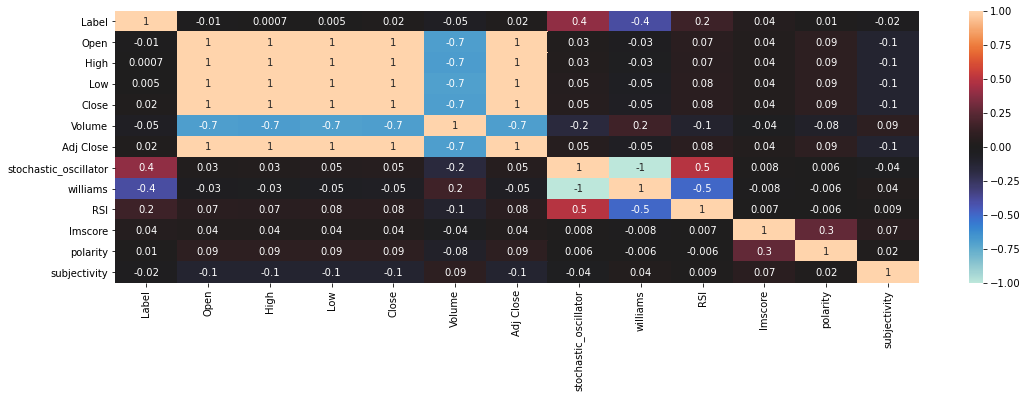

In [495]:
#https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = Cordf.corr()
plt.figure(figsize= (18, 5))
sns.heatmap(Cordf.corr(), annot = True,fmt='.1g', vmin=-1, vmax=1, center= 0)

We can notice that some fetaures which we have addded has strong correaltion with the target variable 

The stacking model with all of our features is our best model. To summarize, below are the results of the modelling changes:

|     Model                                                         |     Test Accuracy    |
|-------------------------------------------------------------------|----------------------|
|     Gradient   Boost (Baseline model)                             |     54.5%            |
|     Gradient   Boost (with Momentum Indicators)                   |     62.4%            |
|     Stacking   Model (Random Forest, AdaBoost, Gradient Boost)    |     68.0%            |
|     Stacking   Model (with Text Sentiment)                        |     69.0%            |